<a href="https://colab.research.google.com/github/elixane/mit_projects/blob/main/Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OnlineCourses/MIT/Project2/ExtraaLearn.csv')

In [ ]:
# # Copy data to avoid any changes to original data
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Check first 5 rows of data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# Check shape of data
data.shape

(4612, 15)

The dataset has 15 columns and 4612 rows.

In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:

- age, website_visits, time_spent_on_website, page_views_per_visit, and status are of numeric data type. The rest of the columns are of object data type.
- The number of non-null values is the same as the total number of entries in the data (there are no null values).

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# Check statistical summary of numerical data
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


Observations:

* The minimum age of leads is 18 and the max is 63, i.e. there is a wide range.
* On average, leads have visited the website 3 to 4 times, but the maximum is 30 visits, showing that a small set of highly engaged leads visit repeatedly.
* Average time spent on the website is 724 seconds (roughly 12 minutes), and the range is 0 to 2537 seconds (roughly 42 minutes), which means some leads spend a significant amount of time exploring.
* The average pages viewed per visit is roughly 3.
* Mean value of status is 0.298, which means roughly 30% of leads convert

In [ ]:
# Check unique values of ID column
data['ID'].nunique()

4612

The column ID is an identifier for leads in the data. This column will not help with our analysis so it can be dropped.

In [ ]:
# Drop ID column
data.drop('ID', axis=1, inplace=True)

In [ ]:
# Make a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Print proportion of each unique value in each column
for column in cat_col:
    print(data[column].value_counts(1))
    print("-" * 50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

Observations:

* Professionals dominate (56.7%), followed by Unemployed (31.2%) and Students (12%), which suggests that ExtraaLearn’s primary audience is working professionals looking to upskill/reskill
* As a first interaction, Website (55.1%) is slightly higher than Mobile App (44.9%). This indicates that the website is the main entry point, but the mobile app is also significant, so both channels are important for lead generation
* Most leads have High or Medium completion of their profiles, very few have Low completion (2.3%)
* Email Activity (49.4%) is the most common last activity, followed by Phone Activity (26.8%), and Website Activity (23.9%)
* Digital Media Ads and Newspaper Ads have been seen by more leads than Magazine ads
* More leads first heard about ExtraaLearn through Educational Channels than through referral

### Univariate Analysis

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def hist_box(data, feature, figsize=(10, 5), kde=False, bins=None):
    # Create the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )

    # Create boxplot and add a triangle to indicate the mean value of the column
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )

    # Create histogram
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )

    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--")

    # Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color = "purple", linestyle = "-")

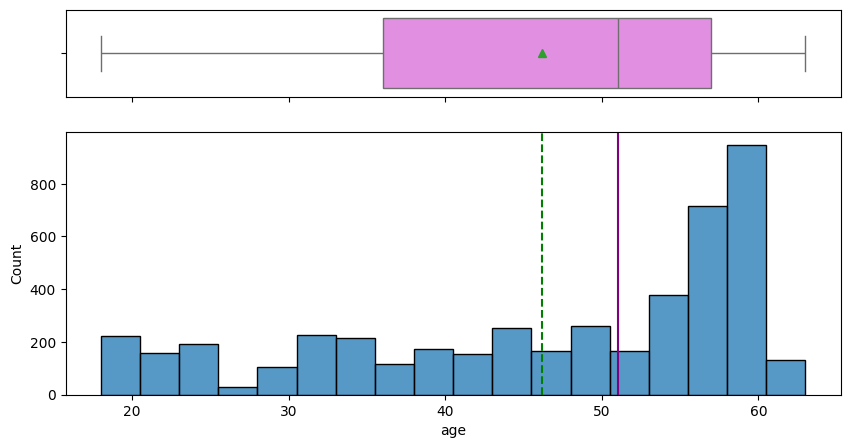

In [ ]:
hist_box(data, 'age')

Observation:

- Age distribution is very left-skewed, with a large amount of leads being in their 50s

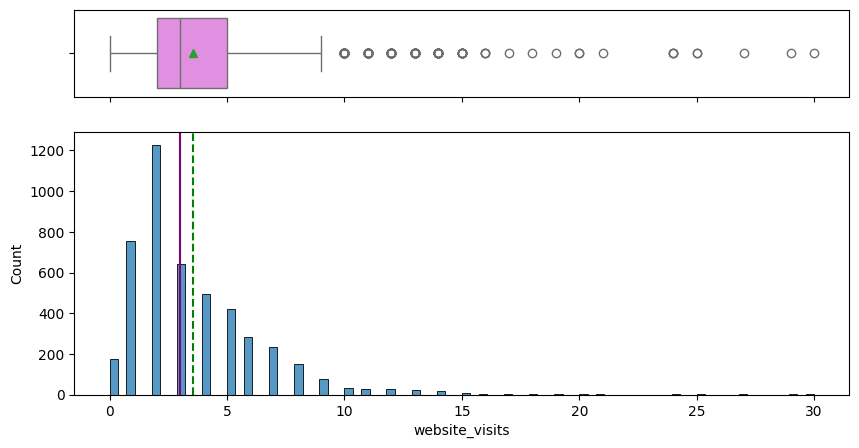

In [ ]:
hist_box(data, 'website_visits')

Observations:

- Website visits distribution looks normally distributed, with a strong right skew
- Not many leads visit the website more than 10 times

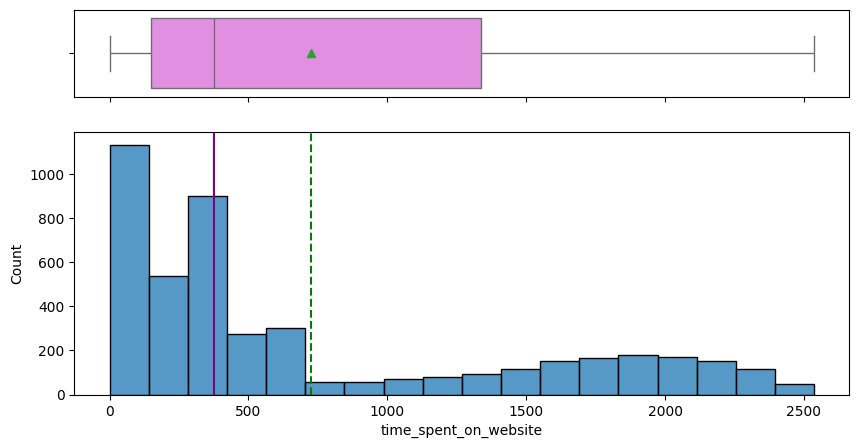

In [ ]:
hist_box(data, 'time_spent_on_website')

Observations:

- Time spent on website distribution is quite right-skewed
- Most leads spend under 10 minutes on the website
- A smaller group spends much longer (15–40 minutes)

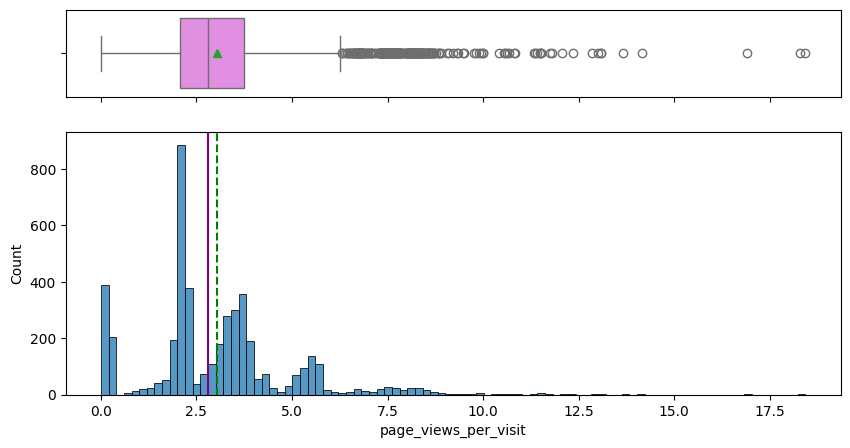

In [ ]:
hist_box(data, 'page_views_per_visit')

Observations:

- Most leads view around 3 pages per visit
- Not many leads view more than 8 pages per visit
- There seem to be a lot of outliers to the right of the distribution

In [ ]:
# Function to create bar chart

def bar_plot(data, feature, perc=False):
    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()

    # Create bar chart
    plt.figure(figsize = (10, 5))
    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "winter",
    )

    # Add labels for class values
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # Percentage of each class of the category
        else:
            label = int(p.get_height())

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        # Annotate the percentage
        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )

    # Show the plot
    plt.show()

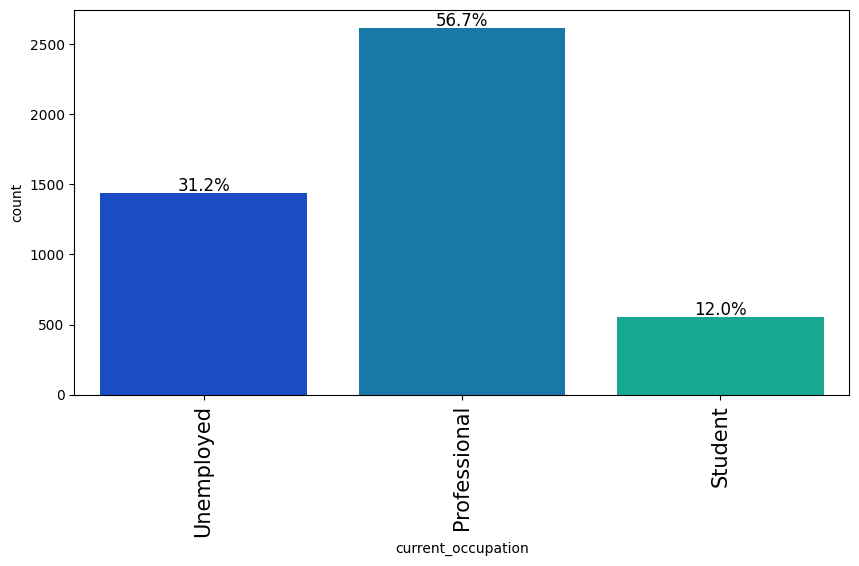

In [ ]:
bar_plot(data, 'current_occupation', True)

Observation:

- Most leads are professionals
- Only a small amount are students

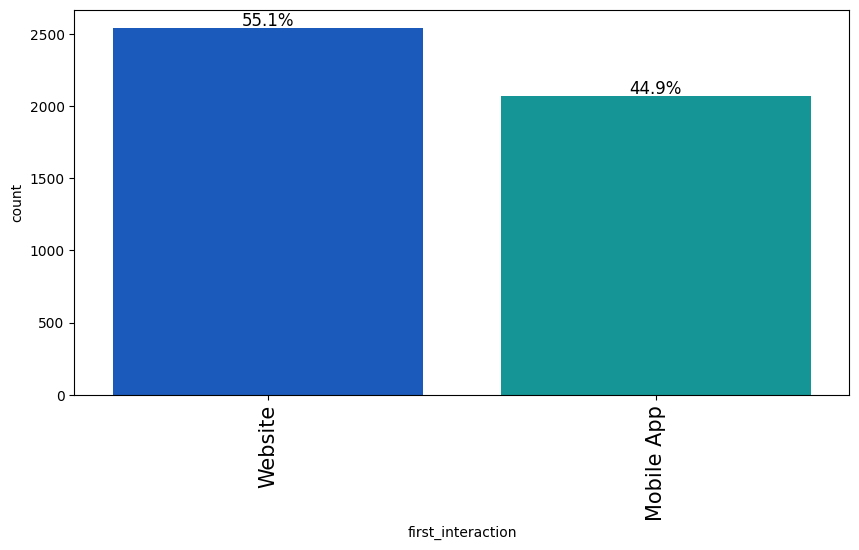

In [ ]:
bar_plot(data, 'first_interaction', True)

Observation:

- More first interactions are made through the website but there doesn't seem to be a very big difference between website and mobile app

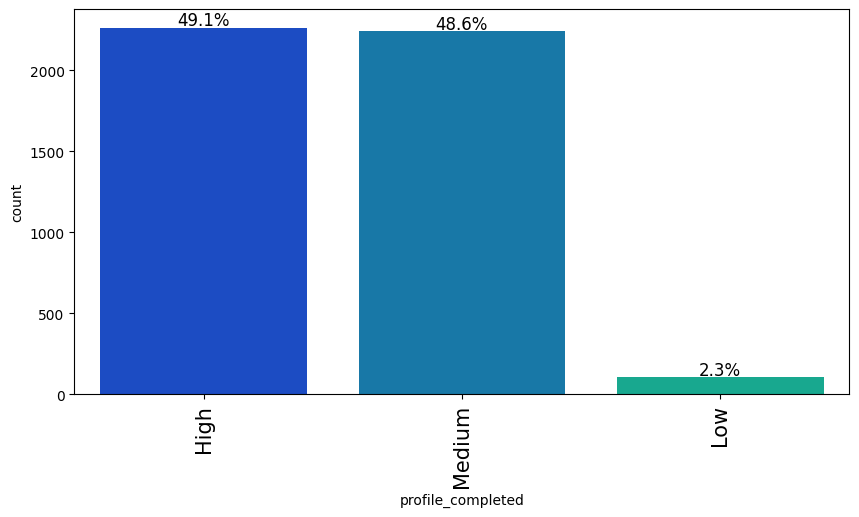

In [ ]:
bar_plot(data, 'profile_completed', True)

Observations:

- Almost all profiles have been completed to a High or Medium level
- Only a very small amount of leads have Low completion (2.3%)

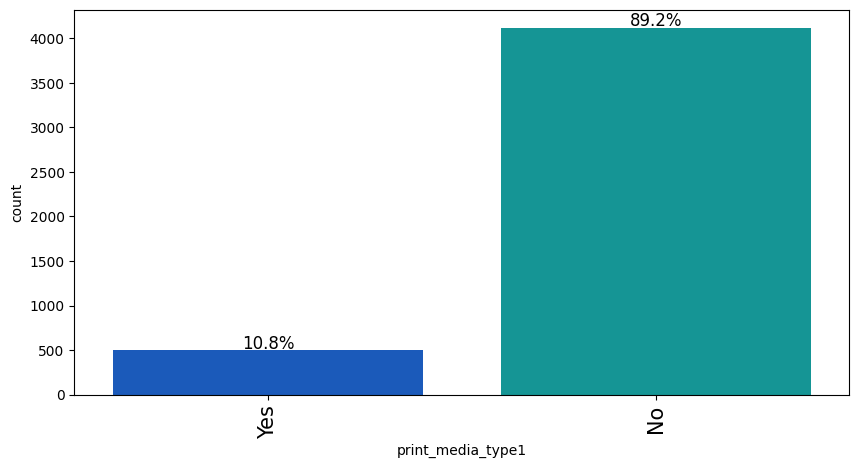

In [ ]:
bar_plot(data, 'print_media_type1', True)

Observation:

- A small amount of leads have seen the newspaper ads

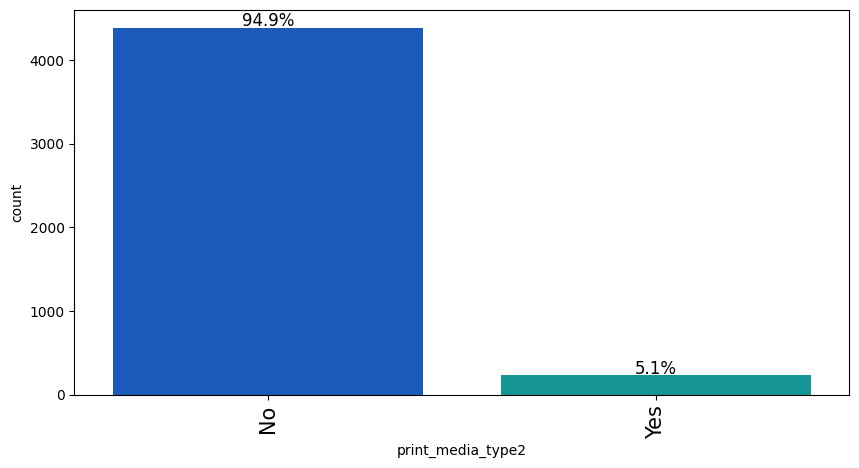

In [ ]:
bar_plot(data, 'print_media_type2', True)

Observation:

- An ever smaller amount of leads have seen the magazine ads

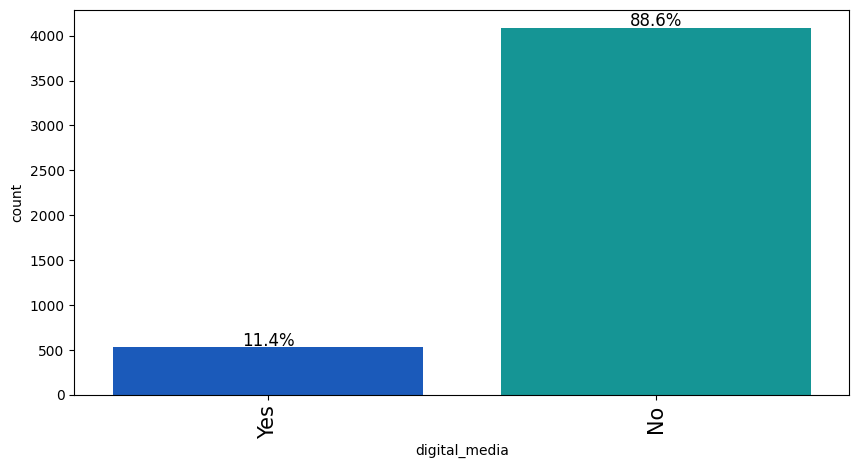

In [ ]:
bar_plot(data, 'digital_media', True)

Observation:

- A small amount of leads have seen digital media ads

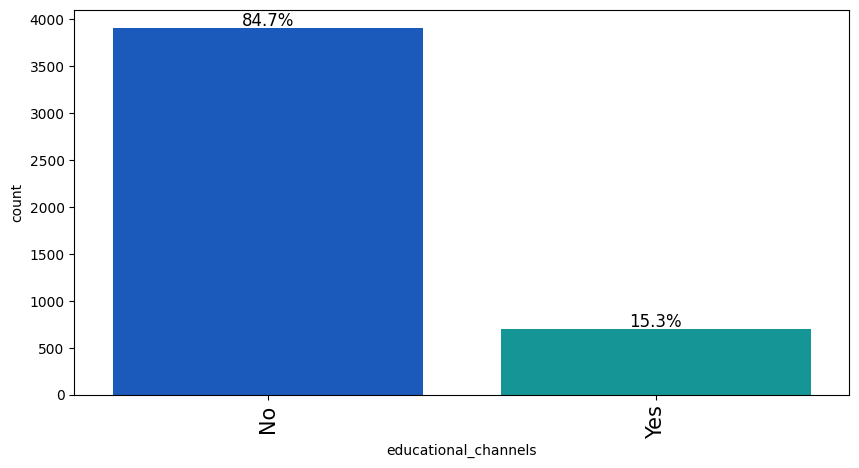

In [ ]:
bar_plot(data, 'educational_channels', True)

Observation:

- A relatively small amount of leads heard about ExtraaLearn through educational channels

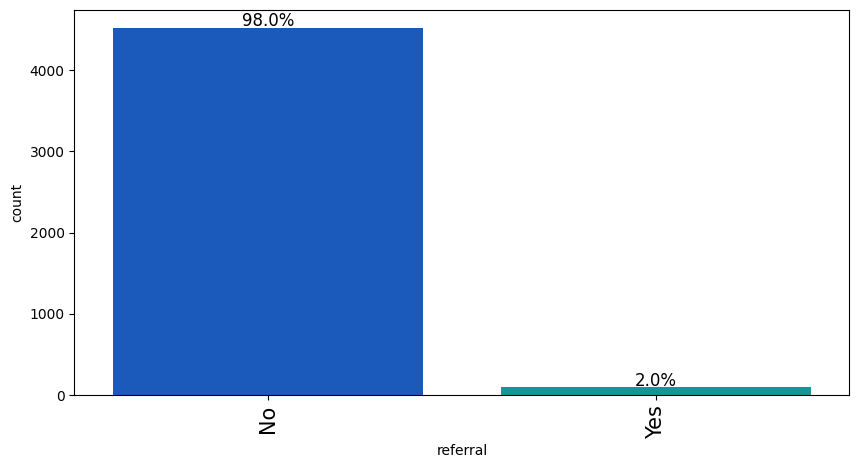

In [ ]:
bar_plot(data, 'referral', True)

Observation:

- Extremely few leads heard about ExtraaLearn through referral

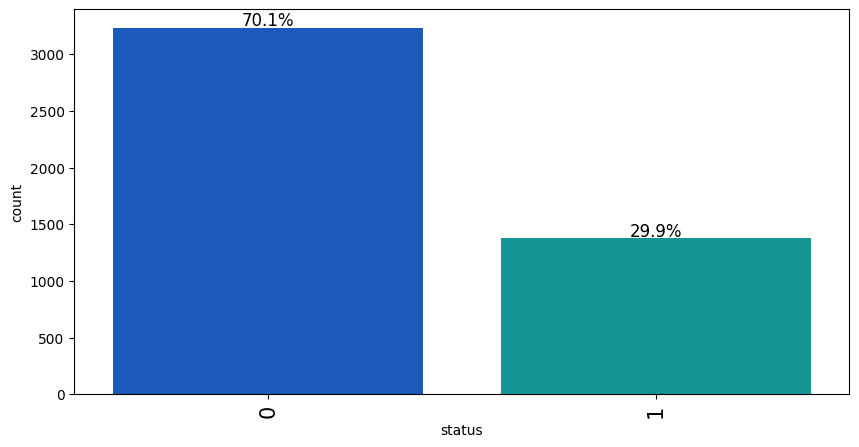

In [ ]:
bar_plot(data, 'status', True)

Observation:

- Roughly 30% of leads converted to paying customers

### Bivariate Analysis

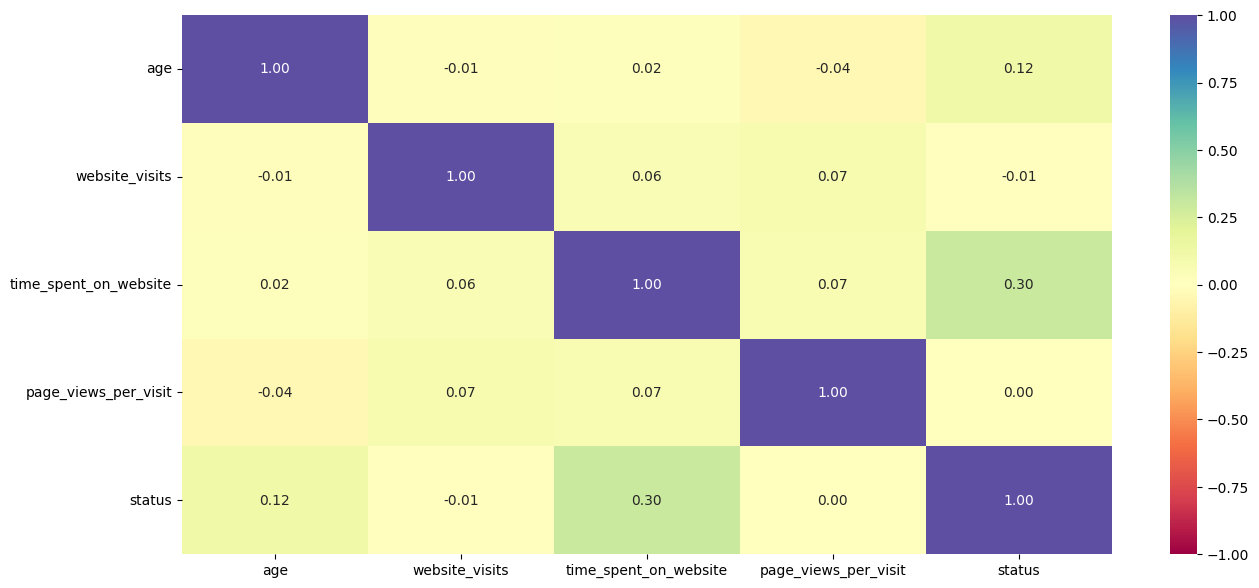

In [ ]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Create heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

- Almost no correlation between numerical variables
- Slight positive correlation between time spent on website and page views per visit
- Very weak positive correlation between age and status

In [ ]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 2, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


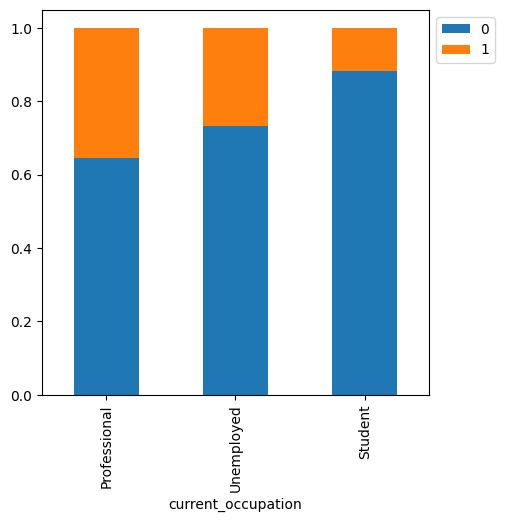

In [ ]:
stacked_barplot(data, 'current_occupation', 'status')

Observations:

- Professional leads produced the highest amount of converted customers, followed by unemployed leads, and then students
- Company should target professionals

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


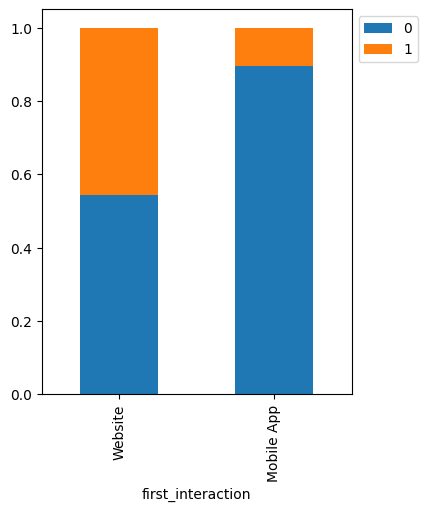

In [ ]:
stacked_barplot(data, 'first_interaction', 'status')

Observations:

- Leads having a first interaction through the website seem to have a much higher rate of conversion than mobile app
- Company should focus on leads who first interacted through the website

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


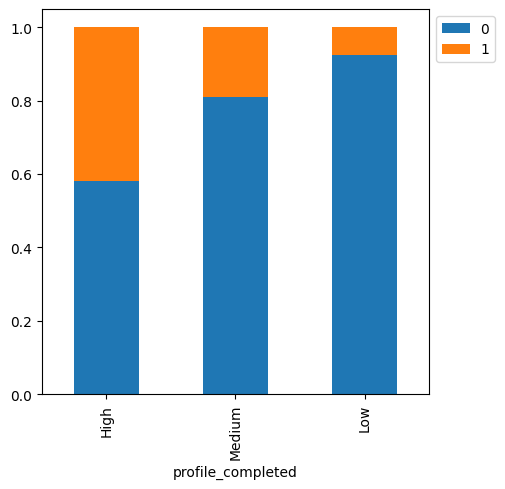

In [ ]:
stacked_barplot(data, 'profile_completed', 'status')

Observation:

- More conversions from high profile completion, then medium, then low; i.e. leads whose profiles have higher degrees of completion have a higher conversion rate

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


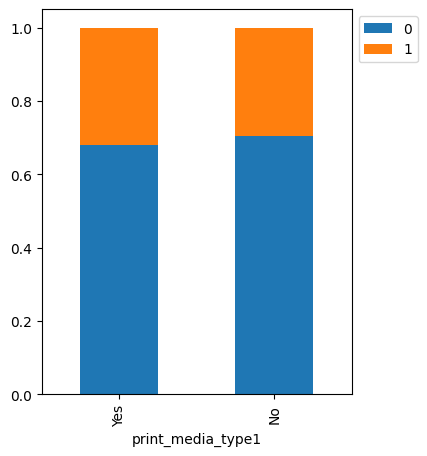

In [ ]:
stacked_barplot(data, 'print_media_type1', 'status')

Observations:

- Same proportion of conversions come from leads who have seen newspapers ads as those who haven't
- Probably doesn't affect conversion

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


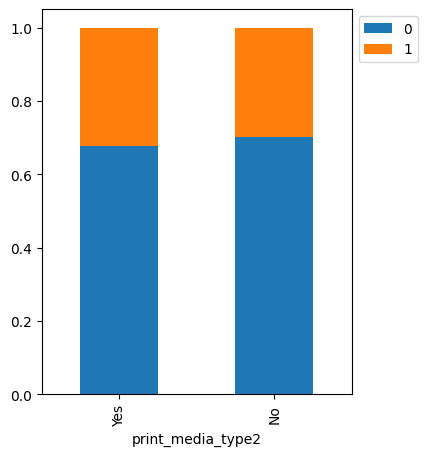

In [ ]:
stacked_barplot(data, 'print_media_type2', 'status')

Observations:

- Same proportion of conversions come from leads who have seen magazine ads as those who haven't
- Probably doesn't affect conversion

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


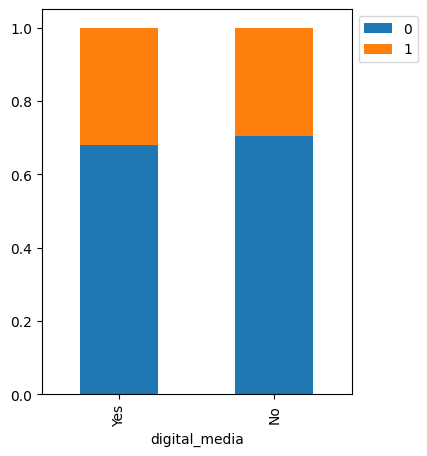

In [ ]:
stacked_barplot(data, 'digital_media', 'status')

Observations:

- Same proportion of conversions come from leads who have seen digital media ads as those who haven't
- Probably doesn't affect conversion

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


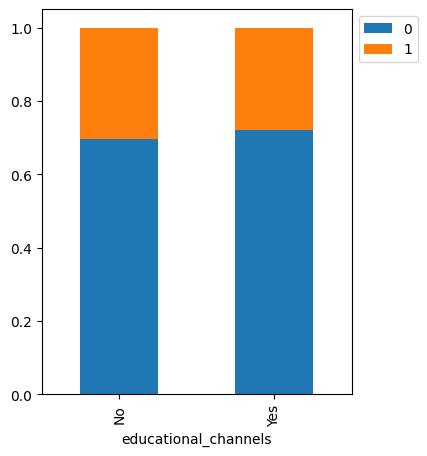

In [ ]:
stacked_barplot(data, 'educational_channels', 'status')

Observations:

- Same proportion of conversions come from leads who heard of ExtraaLearn through educational channels as those who haven't
- Probably doesn't affect conversion

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


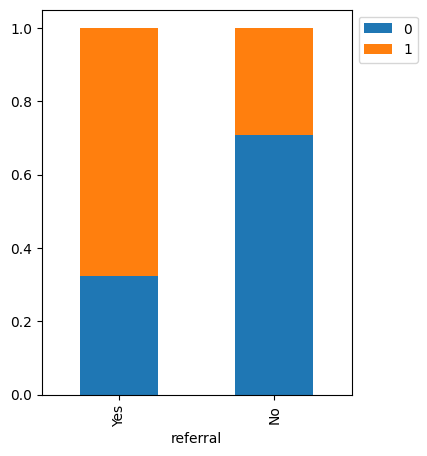

In [ ]:
stacked_barplot(data, 'referral', 'status')

Observation:

- More leads who heard about ExtraaLearn through referral have converted than those who haven't

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


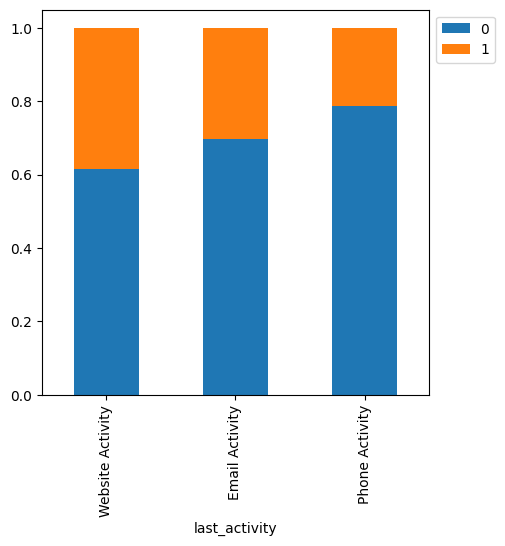

In [ ]:
stacked_barplot(data, 'last_activity', 'status')

Observations:

- Leads who last interacted with the website have the highest proportion of conversions
- Leads who last interacted with phone activity have the lowers proportion of conversions

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


# Data Pre-Processing

In [ ]:
# Set the feature and target variables
X = data.drop('status', axis=1)
y = data['status']

# Create dummy variables for the categorical columns
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Check the shape of the train and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)


## Building a Decision Tree model

## Model evaluation criterion:

### The model can make wrong predictions as:
- Predicting a lead will not convert to a paid customer, but the lead does convert
- Predicting a lead will convert to a paid customer, but the lead does not convert

### Which case is more important?
- If a lead is predicted to not convert and the lead would have converted then the company will lose a potential customer
- If a lead is predicted to convert and the lead doesn't get converted there might be a loss of resources

The first case is more important (the company doesn't want to lose potentional customers).

### How to reduce this loss i.e reduce False Negatives?
The company wants Recall to be maximised, the greater the Recall lesser the chances of false negatives.

In [ ]:
# Create metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Fit the decision tree classifier on the training data
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

# Make predictions on the train and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



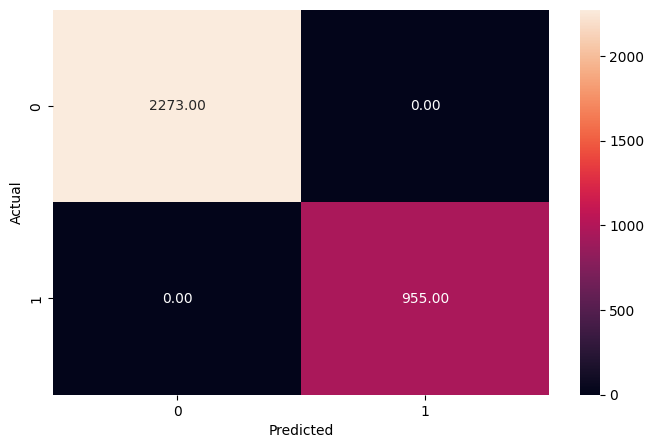

In [ ]:
# Check performance on training data
metrics_score(y_train, y_pred_train)

Observations:

- No errors in the training data
- The model is probably overfitting (check test data)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



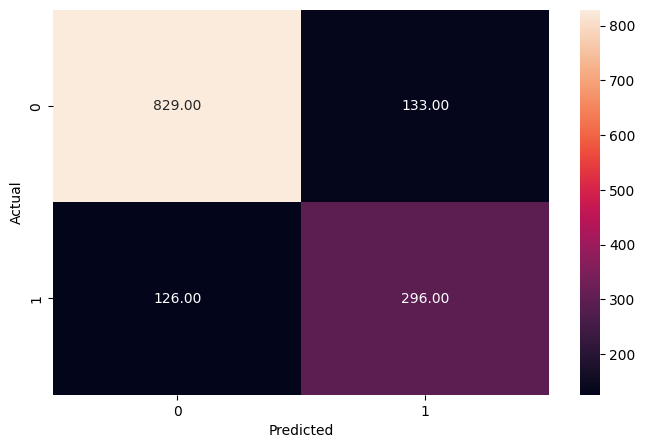

In [ ]:
# Check performance on test data
metrics_score(y_test, y_pred_test)

Observations:

- The model is clearly overfitting
- We will have to tune the decision tree to reduce the overfitting

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 10),
    "max_leaf_nodes": [10, 20, 50, 100],
    "min_samples_split": [3, 5, 10, 30],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5, scoring='recall', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(4), max_leaf_nodes=20,
                       min_samples_split=3, random_state=1)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2273
           1       0.72      0.71      0.71       955

    accuracy                           0.83      3228
   macro avg       0.80      0.80      0.80      3228
weighted avg       0.83      0.83      0.83      3228



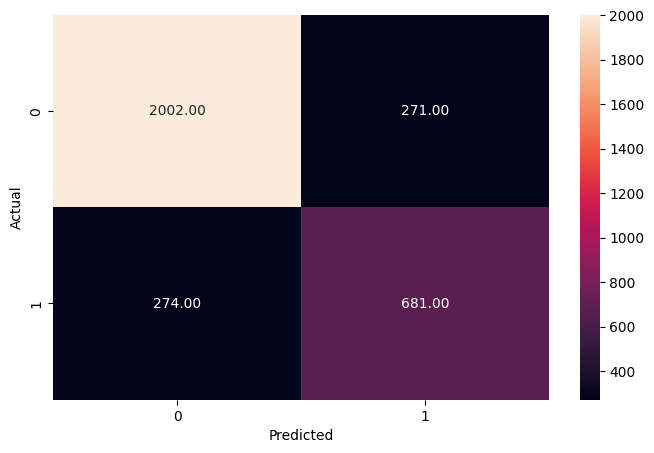

In [ ]:
# Check performance on the training data
y_pred_train2 = estimator.predict(X_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       962
           1       0.70      0.70      0.70       422

    accuracy                           0.82      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.82      0.82      0.82      1384



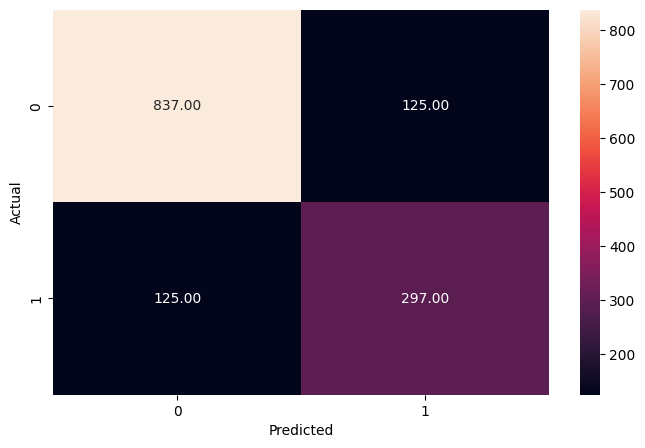

In [ ]:
# Check performance on the test data
y_pred_test2 = estimator.predict(X_test)
metrics_score(y_test, y_pred_test2)

Observations:

- Decision tree model with default parameters is overfitting the training data and is not able to generalise well
- Tuned model has provided a generalised performance with balanced precision and recall values
- However, the model performance on test data has not really improved

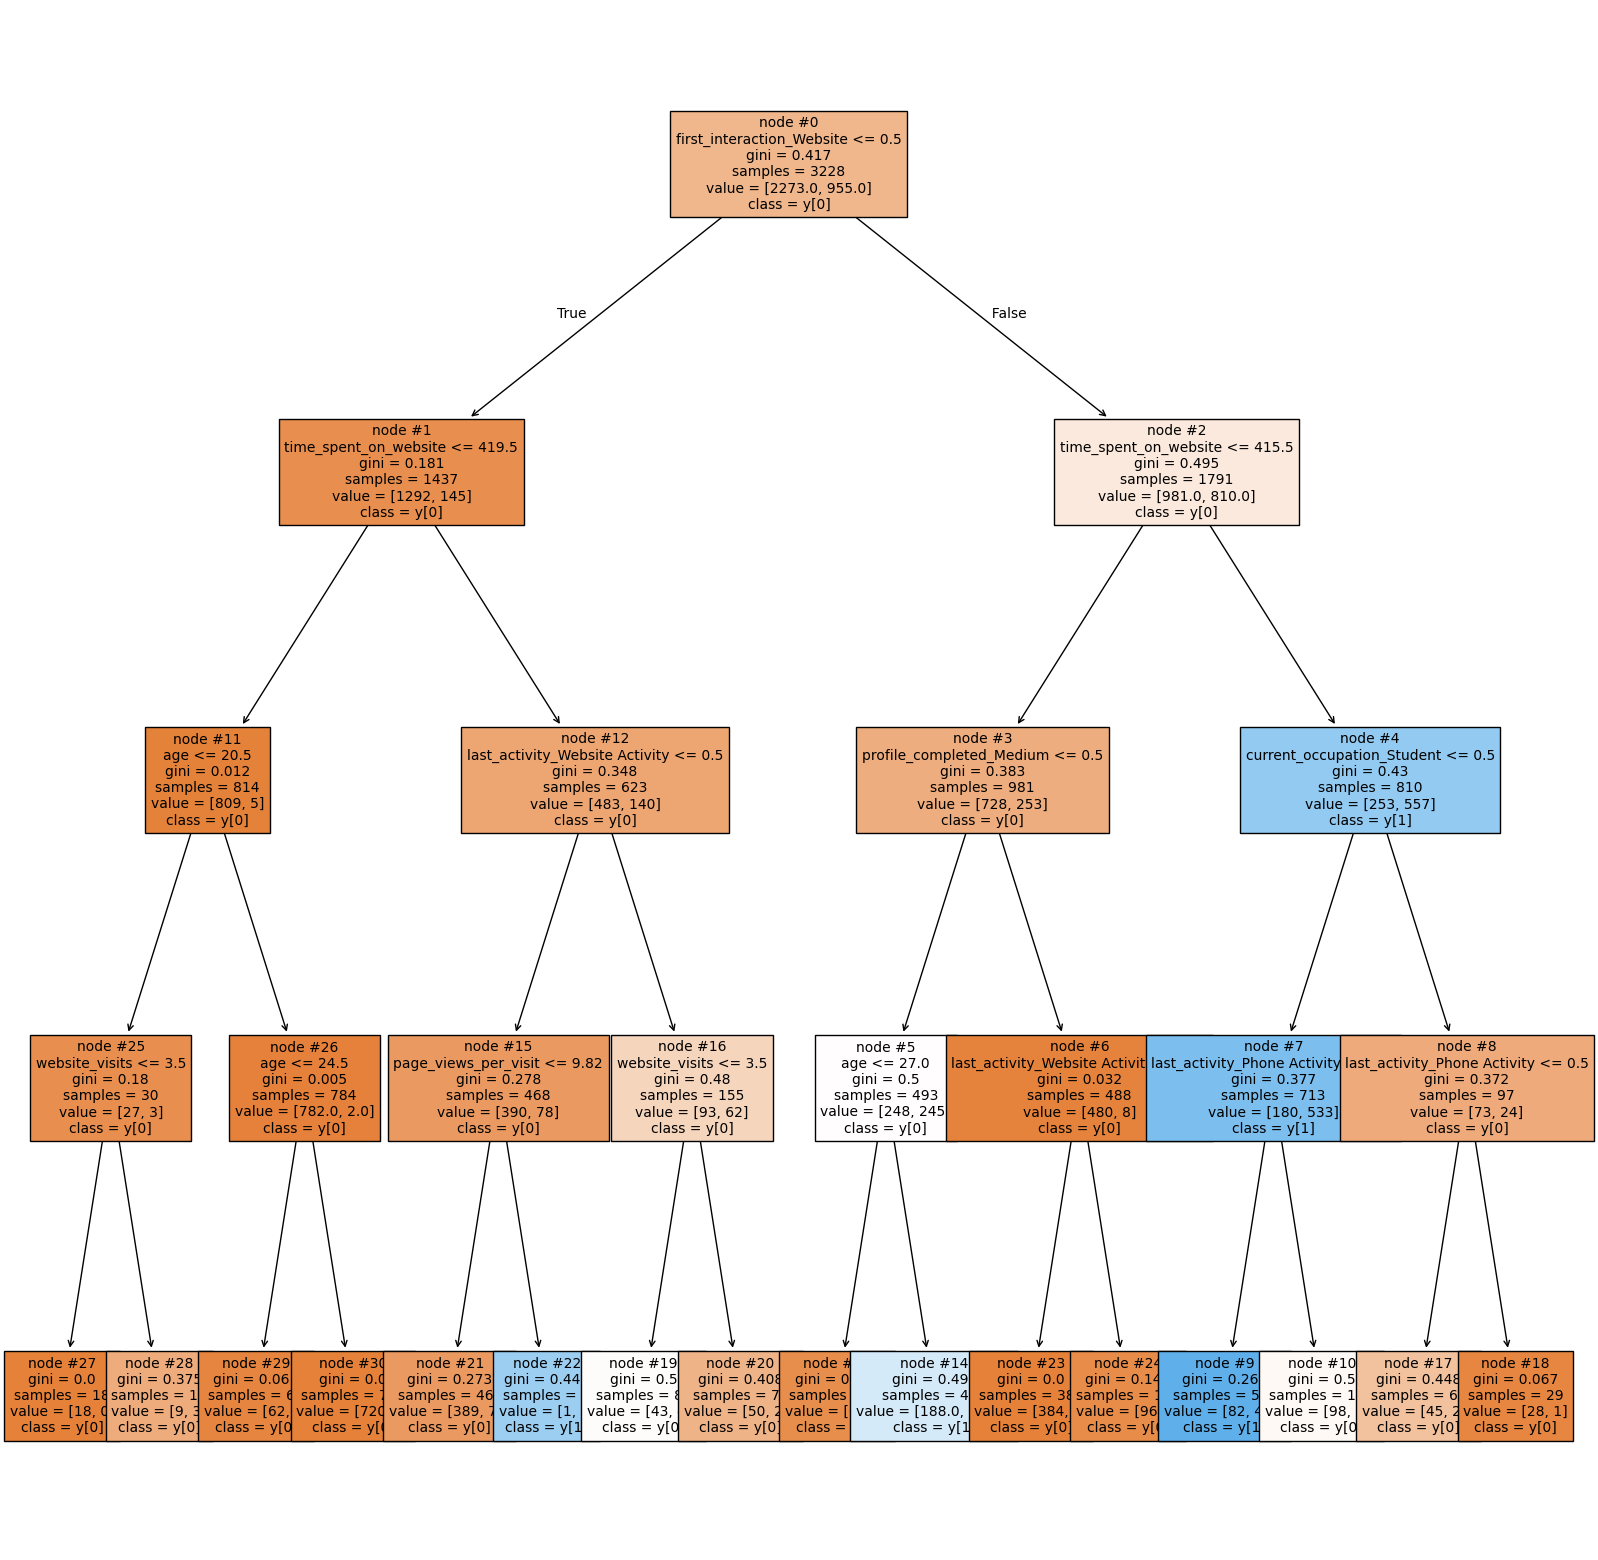

In [ ]:
# Visualise the tree
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(estimator, feature_names = features, filled = True, fontsize = 10, node_ids = True, class_names = True)

plt.show()

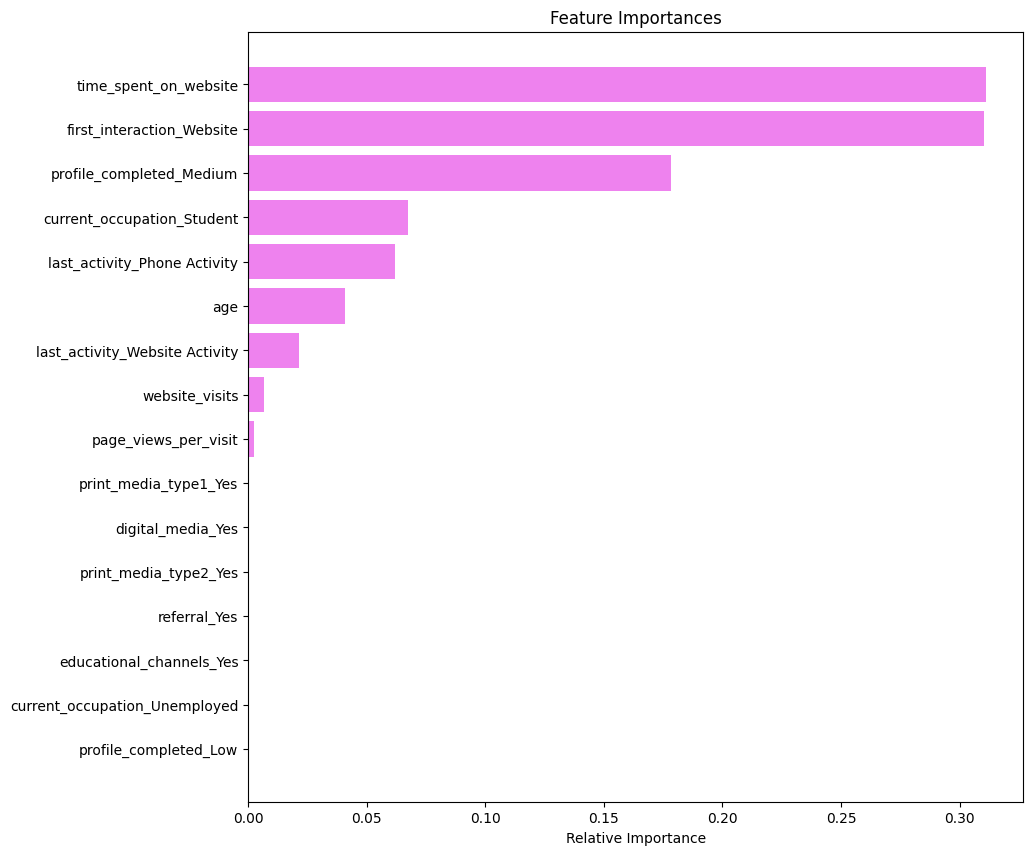

In [ ]:
# Plot importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:

- Time spent on the website and first_interaction_Website are the most important features followed by profile_completed_Medium, current_occupation_Student, last_activity_Phone, age, and last_activity_Website.
- The rest of the variables have very little or no impact in this model, while deciding whether a lead will be converted or not.

## Building a Random Forest model

In [ ]:
# Fit the random forest tree classifier on the training data
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

# Make predictions on the train and test data
y_pred_train3 = rf.predict(X_train)
y_pred_test3 = rf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



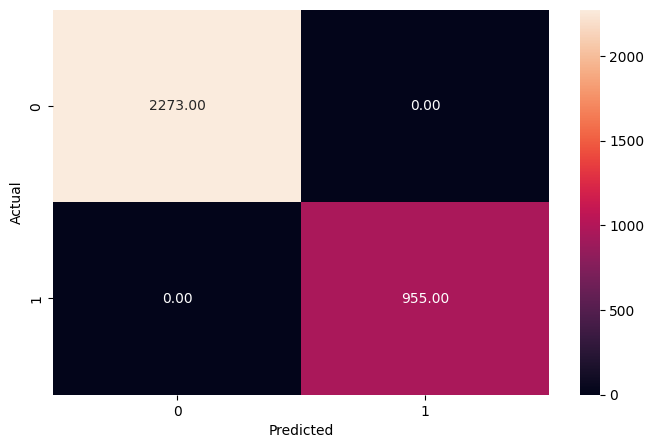

In [ ]:
# Check performance on training data
metrics_score(y_train, y_pred_train3)

Observations:

- No errors on training data
- Check performance on test data to see if model is overfitting

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



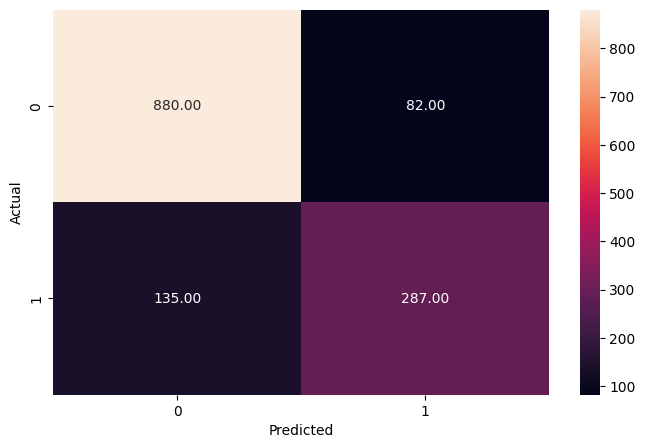

In [ ]:
# Check performance on test data
metrics_score(y_test, y_pred_test3)

Observations:

- The model is clearly overfitting
- We will have to tune the random forest to reduce the overfitting

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
estimator2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters2 = {
    "max_depth": np.arange(2, 10),
    "max_leaf_nodes": [30, 50, 70],
    "min_samples_split": [5, 10, 20],
    "n_estimators": [100, 120]
}

# Run the grid search on the training data
grid_obj2 = GridSearchCV(estimator2, parameters2, cv=5, scoring='recall', n_jobs=-1)
grid_obj2 = grid_obj2.fit(X_train, y_train)


# Set the classifier to the best combination of parameters
estimator2 = grid_obj2.best_estimator_

# Fit the best algorithm to the data
estimator2.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(9), max_leaf_nodes=70,
                       min_samples_split=10, random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2273
           1       0.85      0.76      0.80       955

    accuracy                           0.89      3228
   macro avg       0.88      0.85      0.86      3228
weighted avg       0.89      0.89      0.89      3228



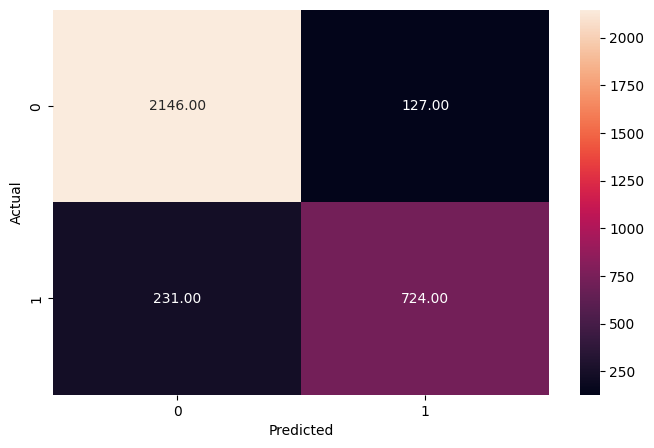

In [ ]:
# Check performance on training data
y_pred_train4 = estimator2.predict(X_train)
metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.82      0.69      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.85      1384



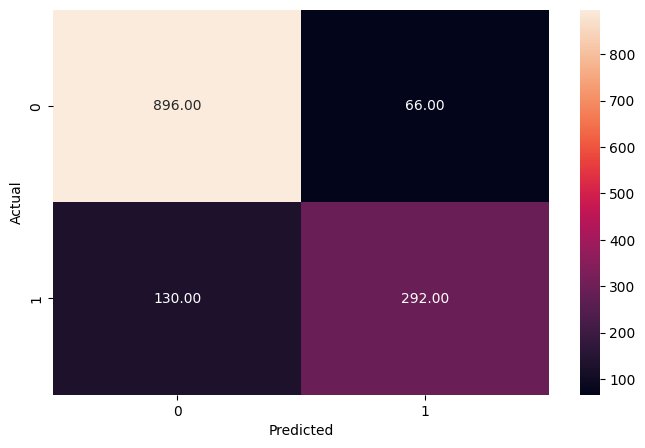

In [ ]:
# Check performance on test data
y_pred_test4 = estimator2.predict(X_test)
metrics_score(y_test, y_pred_test4)

Observations:

- Random forest model with default parameters is overfitting the training data and is not able to generalise well
- Tuned moded has provided a slightly better generalised performance with balanced precision and recall values
- However, there is still some overfitting, and model performance on test data has only slightly improved

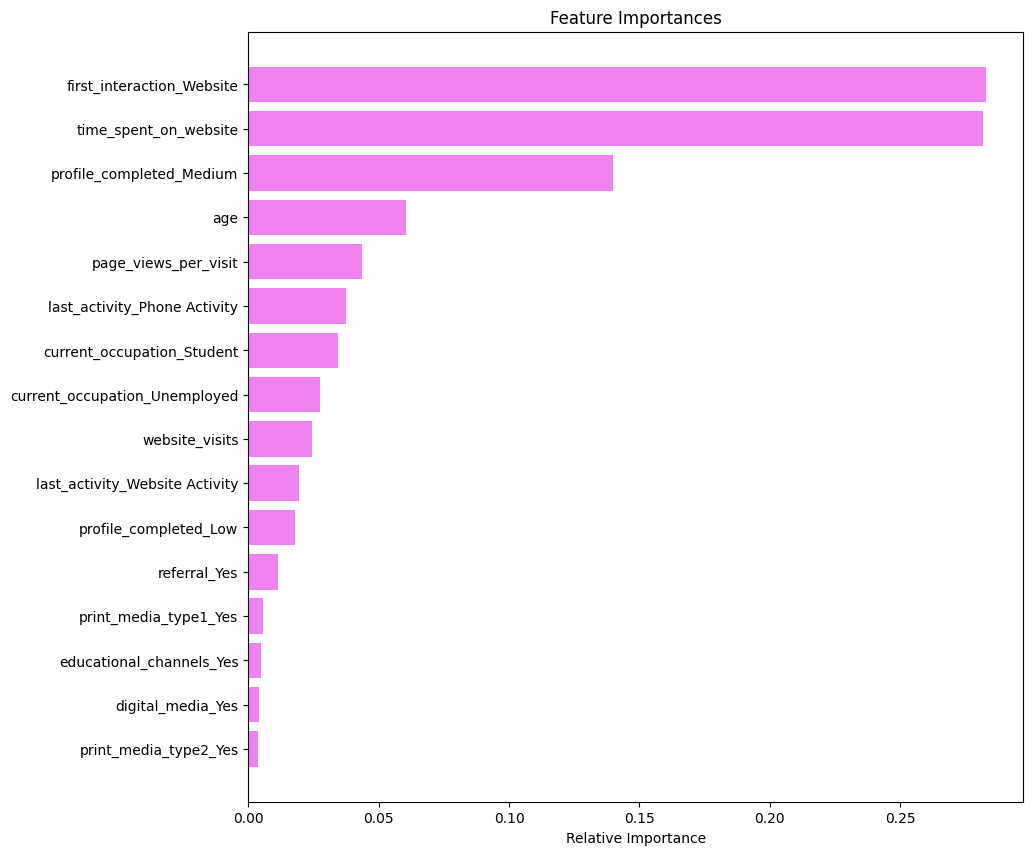

In [ ]:
# Plot importance of features
importances = estimator2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:

- Similar to the decision tree model, time spent on website, first_interaction_website, and profile_completed_Medium, are the top three features that help differentiate between converted and not converted leads.
- Unlike the decision tree model, this model gives some importance to other variables like page_views_per_visit and website_visits as well. This indicates that the random forest gives importance to more factors than the decision tree.

## Actionable Insights and Recommendations

- I recommend prioritising website experience: both models show time_spent_on_website and first_interaction_Website as the top conversion predictors. Redesigning the website to maximise engagement time could lead to higher conversion rates, such as including interactive content and course previews
- profile_completed_Medium is consistently the 3rd most important feature across both models, so I suggest implementing a profile completion scoring system (with progress bars and incentives) to encourage leads to upgrage their profiles
- Despite being only 12% of leads, current_occupation_Student shows notable importance in the Random Forest model so it could be beneficial to target the student demographic
- last_activity_Phone Activity consistently ranks in top 5 features for conversion prediction, so it could be useful to track engagement patterns for phone activity.